In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits.mplot3d import Axes3D

The function np.random.random returns values in the range 0 to 1. So the function random.random((1000,2)) returns values of 1000 rows and 2 columns.

In [51]:
x=np.random.random((1000,2))*6-3 #uniformly distributed between -3 and +3

Below code implements the following function, y=cos(2$x_{1}$)+cos(3$x_{2}$)

In [52]:
y=np.cos(2*x[:,0])+np.cos(3*x[:,1])

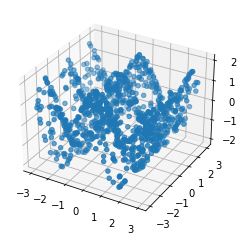

In [53]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],y)

In [54]:
#Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128,input_shape=(2,),activation='relu'),
    tf.keras.layers.Dense(1)
])

In [55]:
#Compile and fit

opt=tf.keras.optimizers.Adam(0.01)
#model.compile(optimizer=opt,loss='mse')
model.compile(optimizer=opt,loss='mse')
r=model.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 529us/step - loss: 0.9919
Epoch 2/100
32/32 [==============================] - 0s 477us/step - loss: 0.9280
Epoch 3/100
32/32 [==============================] - 0s 435us/step - loss: 0.9350
Epoch 4/100
32/32 [==============================] - 0s 467us/step - loss: 0.9008
Epoch 5/100
32/32 [==============================] - 0s 436us/step - loss: 0.8236
Epoch 6/100
32/32 [==============================] - 0s 469us/step - loss: 0.7558
Epoch 7/100
32/32 [==============================] - 0s 479us/step - loss: 0.6647
Epoch 8/100
32/32 [==============================] - 0s 464us/step - loss: 0.6032
Epoch 9/100
32/32 [==============================] - 0s 468us/step - loss: 0.6346
Epoch 10/100
32/32 [==============================] - 0s 469us/step - loss: 0.5758
Epoch 11/100
32/32 [==============================] - 0s 499us/step - loss: 0.5447
Epoch 12/100
32/32 [==============================] - 0s 505us/step - loss: 0.5310
Epoch 13/100


32/32 [==============================] - 0s 499us/step - loss: 0.0102
Epoch 100/100
32/32 [==============================] - 0s 499us/step - loss: 0.0077


In [50]:
r.history.keys()

dict_keys(['loss'])

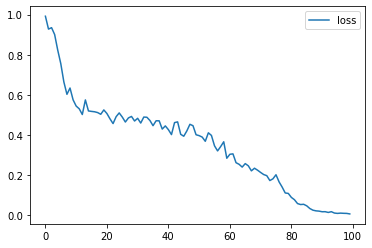

In [56]:
plt.plot(r.history['loss'],label='loss')
plt.legend()

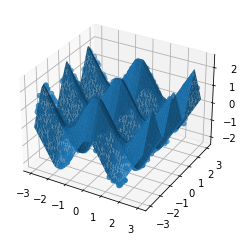

In [63]:
#Plot the prediction surface
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],y)

#Surface Plot
line=np.linspace(-3,3,50)
xx, yy = np.meshgrid(line,line)
xgrid = np.vstack((xx.flatten(),yy.flatten())).T
yhat = model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0],xgrid[:,1],yhat,linewidth=0.2,antialiased=True)
plt.show()

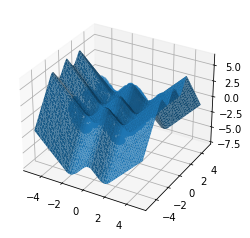

In [61]:
#Can it extrapolate?..... It doesn't
#Plot the prediction surface
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],y)

#Surface Plot
line=np.linspace(-5,5,50)
xx, yy = np.meshgrid(line,line)
xgrid = np.vstack((xx.flatten(),yy.flatten())).T
yhat = model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0],xgrid[:,1],yhat,linewidth=0.2,antialiased=True)
plt.show()

In [65]:
line=np.linspace(-3,3,5)
xx1, yy1 = np.meshgrid(line,line)
#xgrid = np.vstack((xx.flatten(),yy.flatten())).T

In [66]:
xx1

array([[-3. , -1.5,  0. ,  1.5,  3. ],
       [-3. , -1.5,  0. ,  1.5,  3. ],
       [-3. , -1.5,  0. ,  1.5,  3. ],
       [-3. , -1.5,  0. ,  1.5,  3. ],
       [-3. , -1.5,  0. ,  1.5,  3. ]])

In [67]:
line

array([-3. , -1.5,  0. ,  1.5,  3. ])

In [68]:
xx1.flatten()

array([-3. , -1.5,  0. ,  1.5,  3. , -3. , -1.5,  0. ,  1.5,  3. , -3. ,
       -1.5,  0. ,  1.5,  3. , -3. , -1.5,  0. ,  1.5,  3. , -3. , -1.5,
        0. ,  1.5,  3. ])

In [69]:
yy1

array([[-3. , -3. , -3. , -3. , -3. ],
       [-1.5, -1.5, -1.5, -1.5, -1.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1.5,  1.5,  1.5,  1.5,  1.5],
       [ 3. ,  3. ,  3. ,  3. ,  3. ]])

In [73]:
np.vstack((xx1.flatten(),yy1.flatten()))

array([[-3. , -1.5,  0. ,  1.5,  3. , -3. , -1.5,  0. ,  1.5,  3. , -3. ,
        -1.5,  0. ,  1.5,  3. , -3. , -1.5,  0. ,  1.5,  3. , -3. , -1.5,
         0. ,  1.5,  3. ],
       [-3. , -3. , -3. , -3. , -3. , -1.5, -1.5, -1.5, -1.5, -1.5,  0. ,
         0. ,  0. ,  0. ,  0. ,  1.5,  1.5,  1.5,  1.5,  1.5,  3. ,  3. ,
         3. ,  3. ,  3. ]])

In [76]:
xgrid1=np.vstack((xx1.flatten(),yy1.flatten())).T

In [87]:
model.predict(xgrid1).flatten()

array([-0.01325151, -1.9906243 ,  0.06966481, -1.7946059 ,  0.2572995 ,
        0.7422675 , -1.1973356 ,  0.8324623 , -1.0606127 ,  0.983852  ,
        2.2052507 ,  0.125961  ,  2.0939636 ,  0.1036112 ,  2.11266   ,
        0.91838765, -1.1495456 ,  0.8520912 , -1.0808798 ,  0.93111837,
        0.08302477, -1.9582468 ,  0.08120045, -1.8173789 ,  0.3016766 ],
      dtype=float32)

In [86]:
ax.plot_trisurf(xgrid1[:,0],xgrid1[:,1],yhat1,linewidth=0.2,antialiased=True)
plt.show()